# Classification - Predicting if song is popular or not
Popular (1) if popularity >= 60 <br>
Not popular (0) if popularity < 60

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [37]:
data = pd.read_csv("../data/data.csv")

In [38]:
data['popular_song'] = (data['popularity'] >= 60).astype(int)
X = data.drop(['popularity','artists','id','name','release_date','popular_song'],axis=1) #removed this from data
y = data['popular_song']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (136522, 14)
Test shape: (34131, 14)


In [40]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
clf.score(X_test_scaled,y_test)

0.9222700770560488

In [42]:
y_pred = clf.predict(X_test_scaled)

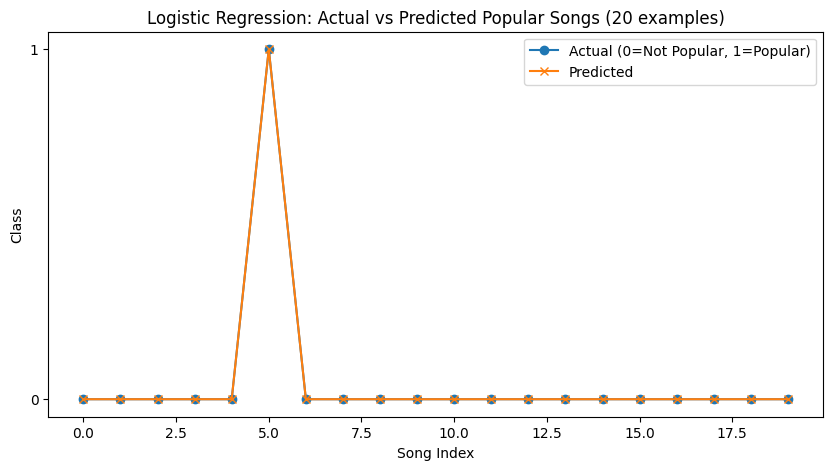

In [43]:
import matplotlib.pyplot as plt

y_test_sample = y_test.iloc[:20].values
y_pred_sample = y_pred[:20]


plt.figure(figsize=(10,5))
plt.plot(range(20), y_test_sample, marker='o', label="Actual (0=Not Popular, 1=Popular)")
plt.plot(range(20), y_pred_sample, marker='x', label="Predicted")

plt.title("Logistic Regression: Actual vs Predicted Popular Songs (20 examples)")
plt.xlabel("Song Index")
plt.ylabel("Class")
plt.yticks([0,1])  
plt.legend()
plt.show()
